In [22]:
import pandas as pd
import numpy as np
import os
from dateutil.parser import parse
from pandas.tseries.offsets import BDay
import pickle as pkl
import fnmatch
import datetime as dt
from datetime import timedelta
import glob
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
def listdirs(folder): #return only directories from a master folder
    return [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]

def find_path(basepath, stringname):
    for fname in os.listdir(basepath):
        path = os.path.join(basepath, fname)
        if os.path.isdir(path):
            if stringname in fname:
                return path
def get_ticket(rx_path):
    ticker=rx_path.split(".")[0].split("/")[-1].split("-")[0]
    return ticker

def ticker_trades_dir(ticker):
    dest=os.path.join(os.getenv('FINANCE_DATA'), "_".join((ticker,'trades')))
    if not os.path.isdir(dest):
        os.makedirs(dest)
def quotes_trades_dir(ticker):
    dest=os.path.join(os.getenv('FINANCE_DATA'), "_".join((ticker,'quotes')))
    if not os.path.isdir(dest):
        os.makedirs(dest)
def agg_on_trd_time(gr):
    """
    Utility func to aggregate trades on timestamp. All trades with equal time stamp
    will collapse to one row and the traded price will be the volume weighted traded
    price.
    """
    vTrdPrice = np.sum(gr['TradedPrice'] * gr['Volume'])/np.sum(gr['Volume'])
    volume = np.sum(gr['Volume'])

    return pd.Series({'Volume': volume,
                      'TradedPrice': vTrdPrice})

def open_pickle_file(path, pickle_file):
    file_loc = os.path.join(path, pickle_file)
    pickle_to_file = pickle.load(open(file_loc, "rb"))
    return pickle_to_file
def common_member(a, b): 
      
    a_set = set(a) 
    b_set = set(b) 
      
    # check length  
    if len(a_set.intersection(b_set)) > 0: 
        return(a_set.intersection(b_set))   
    else: 
        return("no common elements") 

def f(x):
     return Series(dict(Number_of_tweets = x['content'].count(), 
                        Company=x['Company'].min(),
                        Description=x['from_user_description'].min(),
                        ))
    
def obv_calc(df):
    df['SignedVolume']=df['Volume']*np.sign(df['TradedPrice'].diff()).cumsum()
    df['SignedVolume'][:1]=0
    df['OBV']=df['SignedVolume'].cumsum()
    df =df.drop(columns=['SignedVolume'])
    return df
def chaikin_mf(df, period=5):
    df["MF Multiplier"] = (df['TradedPrice']-(df['TradedPrice'].expanding(period).min() ) \
                           - (df['TradedPrice'].expanding(period).max() - df['TradedPrice']))/(df['TradedPrice'].expanding(period).max() - df['TradedPrice'].expanding(period).min())
    df["MF Volume"] = df['MF Multiplier'] * df['Volume'] 
    df['CMF']= df['MF Volume'].sum()/df["Volume"].rolling(5).sum()
    df=df.drop(columns=['MF Multiplier','MF Volume'])
    return df

### folders ###

In [13]:
dataOnlyDrive = ('/media/ak/DataOnly/')
###
bmrg_folders=[s for s in os.listdir(dataOnlyDrive) if s.endswith('Comdty')]
bmrg_trades=[s for s in os.listdir(dataOnlyDrive) if s.endswith('y_trades')]
bmrg_quotes=[s for s in os.listdir(dataOnlyDrive) if s.endswith('y_quotes')]
bmrg_tickers=[bmrg_trades[idx].split('_t')[0] for idx,_ in enumerate(bmrg_trades)]
''' symbol folders '''
symbols = ['FB1', 'TU1', 'TY1', 'FV1']


TY1


In [30]:
# get dates and files
bmrgIdx =0
print(bmrg_quotes[bmrgIdx].split("_")[0])
symbol_quotes = os.path.join(dataOnlyDrive,str(bmrg_quotes[bmrgIdx]))
symbol_trades = os.path.join(dataOnlyDrive,str(bmrg_trades[bmrgIdx]))
symbolQuoteDates = [quoteFile.split(".")[0] for quoteFile in os.listdir(symbol_quotes)] 
symbolTradeDates = [tradeFile.split(".")[0] for tradeFile in os.listdir(symbol_trades)] 


TY1


In [17]:
allQuotesFile = "".join(('AllQuotes',str(bmrg_quotes[bmrgIdx].split("_")[0]),'Comdty.pkl'))
allTradesFile = "".join(('AllTrades',str(bmrg_quotes[bmrgIdx].split("_")[0]),'Comdty.pkl'))

In [23]:
## load Trade and Quote Data ##
symbolQuotesPickle = pkl.load(open("/".join((symbol_trades, allQuotesFile)), "rb"))

In [31]:
symbolTradesPickle = pkl.load(open("/".join((symbol_trades, 'AllTradesTY1Comdty.pkl')), "rb"))


In [26]:
## synthetic data example ##

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats


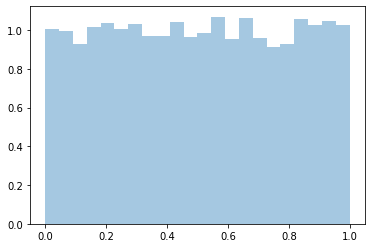

In [4]:
x = stats.uniform(0, 1).rvs(10000)
sns.distplot(x, kde=False, norm_hist=True);

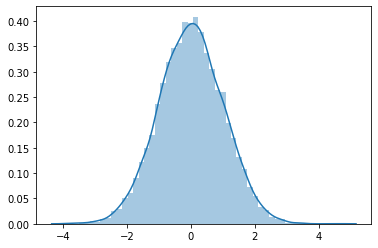

In [5]:
norm = stats.distributions.norm()
x_trans = norm.ppf(x)
sns.distplot(x_trans);

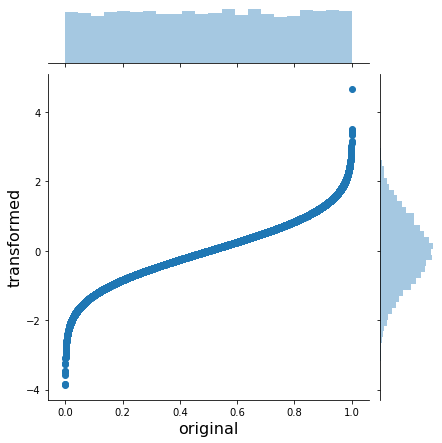

In [6]:
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16);

As you can see, the inverse CDF stretches the outer regions of the uniform to yield a normal.
We can do this for arbitrary (univariate) probability distributions, like the Beta:

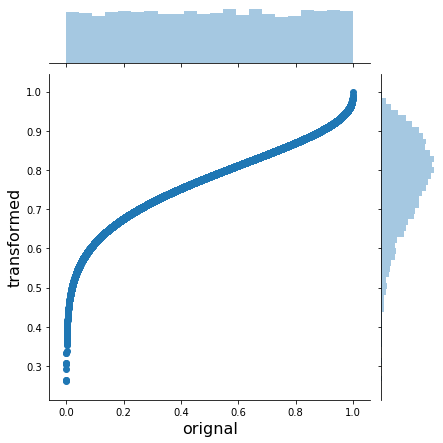

In [7]:
beta = stats.distributions.beta(a=10, b=3)
x_trans = beta.ppf(x)
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('orignal', 'transformed', fontsize=16);

or a Gumbel

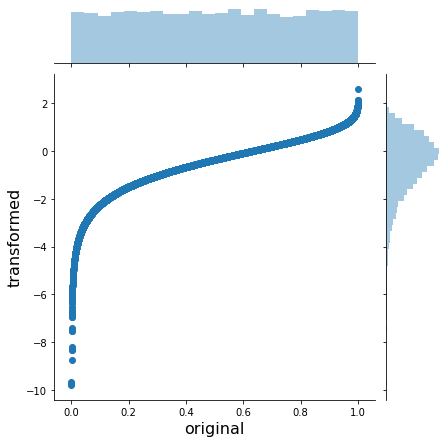

In [8]:
gumbel = stats.distributions.gumbel_l()
x_trans = gumbel.ppf(x)
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16);

In order to do the opposite transformation from an arbitrary distribution to the uniform(0, 1) we just apply the inverse of the inverse CDF -- the CDF:

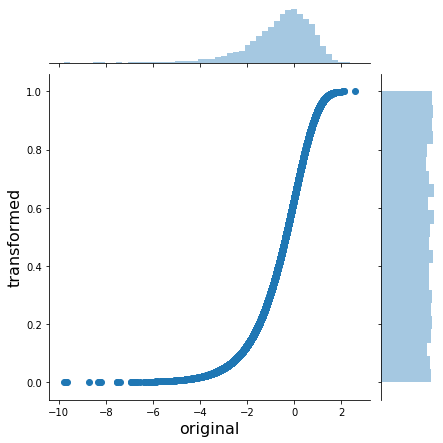

In [9]:
x_trans_trans = gumbel.cdf(x_trans)
h = sns.jointplot(x_trans, x_trans_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16)